In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df=pd.read_csv("titanic_train.csv")

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

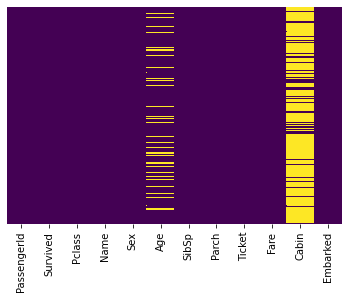

In [56]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

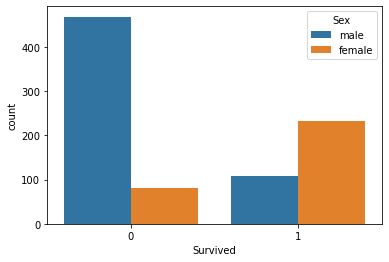

In [57]:
sns.countplot(data=df,x='Survived',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

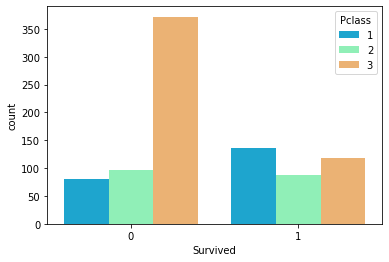

In [58]:
sns.countplot(data=df,x='Survived',hue='Pclass',palette='rainbow')

## Data Cleaning

In [59]:
df_2=df.fillna(method='bfill',axis=0).fillna(0)

<AxesSubplot:>

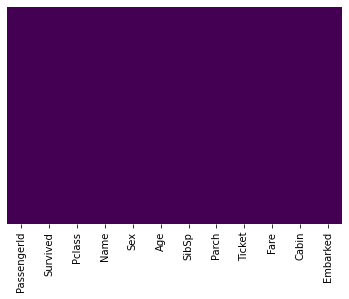

In [60]:
sns.heatmap(df_2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [99]:
df_2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [62]:
df_2.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [63]:
df_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [64]:
sex=pd.get_dummies(df_2['Sex'],drop_first=True)
emb=pd.get_dummies(df_2['Embarked'],drop_first=True)

In [65]:
df_2.drop(['Sex','Embarked'],axis=1,inplace=True)

In [66]:
df_2= pd.concat([df_2,sex,emb],axis=1)

In [67]:
df_2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X=df_2.drop('Survived',axis=1)

In [70]:
y=df_2['Survived']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
LR=LogisticRegression()

In [74]:
LR.fit(X_train,y_train)

C:\Users\Vanshika Nehra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
pred = LR.predict(X_test)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       154
           1       0.80      0.61      0.69       114

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.75       268
weighted avg       0.77      0.77      0.76       268



In [78]:
print(confusion_matrix(y_test,pred))

[[136  18]
 [ 44  70]]


## Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dtree=DecisionTreeClassifier()

In [81]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
pred=dtree.predict(X_test)

In [83]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       154
           1       0.77      0.68      0.72       114

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



In [84]:
print(confusion_matrix(y_test,pred))

[[131  23]
 [ 37  77]]


## Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
RF=RandomForestClassifier()

In [87]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
pred=RF.predict(X_test)

In [89]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       154
           1       0.85      0.68      0.75       114

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [90]:
print(confusion_matrix(y_test,pred))

[[140  14]
 [ 37  77]]


In [94]:
def count(x):
    if x==1:
        return 1
    else:
        return 0

In [112]:
total_survivers=df_2['Survived'].apply(count)

In [113]:
total_survivers.sum()
#Total Number of Survivers

342

In [114]:
def count_male_survivers(cols):
    M=cols[0]
    S=cols[1]
    if M==1 and S==1:
        return 1
    else:
        return 0
    
    
male_survivers=df_2[['male','Survived']].apply(count_male_survivers,axis=1)

In [133]:
male_survivers.sum()
# Male Survivers

109

In [122]:
female_survivers=total_survivers-male_survivers
female_survivers.sum()
# Female Survivers

233

C:\Users\Vanshika Nehra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

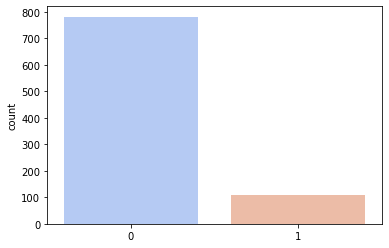

In [134]:
sns.countplot(male_survivers,palette='coolwarm')

C:\Users\Vanshika Nehra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

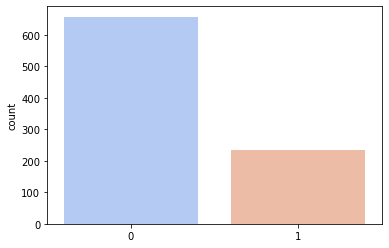

In [135]:
sns.countplot(female_survivers,palette='coolwarm')